In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tqdm
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## OTHER INDICATORS

In [ ]:
# OTHER INDICATORS
# df1 = pd.read_csv('/content/drive/My Drive/Satellite-Project-Village-level/Vill.csv')
df = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/final_data/Lorenz_Curve/combined_gini_2001_2011_2019_different_populations_msl_msw_raw_data.pickle', 'rb'))
df1=df.copy()

In [ ]:
df1

Gini_2001  ...    MSL_ADV
STATE_CODE_2011 DIST_CODE_2011             ...           
3.0             35.0             0.062119  ...  94.441778
                37.0             0.061080  ...  97.434544
                38.0             0.082011  ...  96.895878
                39.0             0.090795  ...  97.422434
                40.0             0.098685  ...  98.062711
...                                   ...  ...        ...
33.0            627.0            0.000000  ...  93.146273
                630.0            0.059325  ...  85.678938
                631.0            0.041982  ...  87.321533
                632.0            0.130893  ...  92.062486
                633.0            0.118118  ...  90.360422

[415 rows x 26 columns]

In [ ]:
#2,3,4,5,6,9,16,17,18,43

df1 = df1.iloc[:, [-6, -5, -4]]
df1

MSW_RUD    MSW_INT    MSW_ADV
STATE_CODE_2011 DIST_CODE_2011                                 
3.0             35.0             1.495796  81.949131  16.551802
                37.0             2.206693  59.927687  37.859343
                38.0             2.287025  51.457119  46.256845
                39.0             2.474178  53.299406  44.222848
                40.0             3.177832  67.332771  29.486795
...                                   ...        ...        ...
33.0            627.0            3.228847  11.173935  85.596197
                630.0           23.009912  14.874154  62.118051
                631.0           10.608059  21.337196  68.054712
                632.0            4.494088  10.179336  85.342324
                633.0            8.636796  13.619736  77.720937

[415 rows x 3 columns]

In [ ]:
# df1 = df1.values
# print(df1.shape)
# df1

In [ ]:
# IN = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/4.Training_CNN_(Arch_3)/Data/2nd_Level_Regression_Inp/final_household_ind_reg_input_2011_softmax_ind_StandardScaler_asset_additionalFeatures.pickle', 'rb'))
vill_2011 = np.array(df.index)
vill_2011 = set(vill_2011)
len(vill_2011)

415

In [ ]:
states_to_be_removed = set(['UK', 'TR', 'SK', 'MZ', 'MN', 'AS', 'KL'])

In [ ]:
df1

MSW_RUD    MSW_INT    MSW_ADV
STATE_CODE_2011 DIST_CODE_2011                                 
3.0             35.0             1.495796  81.949131  16.551802
                37.0             2.206693  59.927687  37.859343
                38.0             2.287025  51.457119  46.256845
                39.0             2.474178  53.299406  44.222848
                40.0             3.177832  67.332771  29.486795
...                                   ...        ...        ...
33.0            627.0            3.228847  11.173935  85.596197
                630.0           23.009912  14.874154  62.118051
                631.0           10.608059  21.337196  68.054712
                632.0            4.494088  10.179336  85.342324
                633.0            8.636796  13.619736  77.720937

[415 rows x 3 columns]

In [ ]:
float(df1.loc[(3, 35), ['MSL_RUD']])

KeyError: ignored

In [ ]:
# FOR OTHER INDICATORS

feature_list = []
vill_code = []
count = 0
for code in df1.index:
  # BF
  feature_list.append([float(df1.loc[code, ['MSW_RUD']]),float(df1.loc[code, ['MSW_INT']]),float(df1.loc[code, ['MSW_ADV']])])
  vill_code.append((code, count))
  count += 1 
  #vill_code.append((df1[i][5], i, filt_vill_dict[df1[i][5]]))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(feature_list)
y_kmeans = kmeans.predict(feature_list)

In [ ]:
cluster_0 = np.array([(feature_list[i], i) for i in range(len(feature_list)) if y_kmeans[i] == 0])
cluster_1 = np.array([(feature_list[i], i) for i in range(len(feature_list)) if y_kmeans[i] == 1])
cluster_2 = np.array([(feature_list[i], i) for i in range(len(feature_list)) if y_kmeans[i] == 2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

In [ ]:
print(len(cluster_0), len(cluster_1), len(cluster_2))

81 205 129


In [ ]:
def create_box_plots(cluster_0, cluster_1, cluster_2):

    # TV, CYCLE, Television, 2W and 4W
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    labels = ['RUD', 'INT', 'ADV']

    ########################################## BOX PLOT 0  ##########################################
    cluster_0_feat = [np.array([int(i[j]) for i,k in cluster_0]) for j in range(3)]
    
    input_0 = [cluster_0_feat[0],cluster_0_feat[1],cluster_0_feat[2]]

    # rectangular box plot
    bplot0 = axes[0].boxplot(input_0,
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[0].set_title('CLUSTER 1')

    ########################################## BOX PLOT 1  ##########################################
    cluster_1_feat = [np.array([int(i[j]) for i,k in cluster_1]) for j in range(3)]
    
    input_1 = [cluster_1_feat[0],cluster_1_feat[1],cluster_1_feat[2]]

    bplot1 = axes[1].boxplot(input_1,
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[1].set_title('CLUSTER 2')

    ########################################## BOX PLOT 2  ##########################################
    cluster_2_feat = [np.array([int(i[j]) for i,k in cluster_2]) for j in range(3)]
    
    input_2 = [cluster_2_feat[0],cluster_2_feat[1],cluster_2_feat[2]]

    bplot2 = axes[2].boxplot(input_2,
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[2].set_title('CLUSTER 3')


    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen','red','blue']
    for bplot in (bplot0, bplot1, bplot2):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)

    # adding horizontal grid lines
    for ax in axes:
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)
        #ax.set_xlabel('Main-Source-of-Water wise distribution')
        #ax.set_xlabel('Fuel of Cooking')
        ax.set_xlabel('Bathroom Facility')
        
        ax.set_ylabel('Observed % values')
        ax.set_ylim(0, 100)    

    plt.show()
    
    return cluster_0_feat, cluster_1_feat, cluster_2_feat

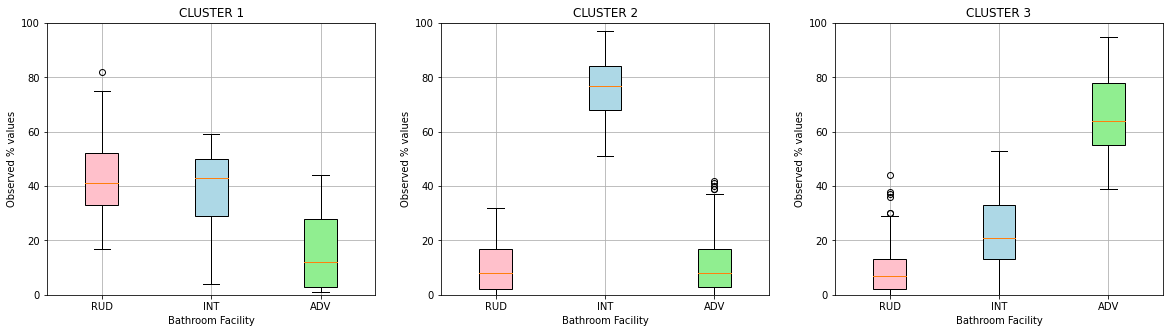

In [ ]:
_,_,_ = create_box_plots(cluster_0, cluster_1, cluster_2)

In [ ]:
cluster_0

array([[list([32.483063054514396, 34.46631683825971, 33.05337951321346]),
        36],
       [list([34.65200550297682, 23.488619274650723, 41.86680898503286]),
        41],
       [list([31.27772359431626, 58.480818785275936, 10.243870826986868]),
        45],
       [list([53.654173148979986, 13.637285974099964, 32.70982054035104]),
        52],
       [list([51.92357917886918, 19.994334668596625, 28.07823745245228]),
        53],
       [list([58.82058173784978, 29.62958394698085, 11.559103460972016]),
        54],
       [list([73.18890876931796, 14.385358974534082, 12.425054121053602]),
        55],
       [list([42.52069200361252, 21.028328620286338, 36.4504737722636]),
        56],
       [list([25.051310764729294, 51.48394165295122, 23.4674508664924]),
        57],
       [list([40.18821066753018, 28.471773372808435, 31.34630094370172]),
        58],
       [list([29.127864883204474, 48.59181557410758, 22.269826965783842]),
        59],
       [list([23.263771857209246, 52.5823

In [ ]:
vill_code_array = np.array(vill_code)
union_feature_indices = np.union1d(np.union1d(cluster_0[:, 1], cluster_1[:, 1]), cluster_2[:, 1]).astype(int)
original_indices = (vill_code_array[:,1])[union_feature_indices].astype('int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
df2 = df1.iloc[original_indices, :]
df2

MSW_RUD    MSW_INT    MSW_ADV
STATE_CODE_2011 DIST_CODE_2011                                 
3.0             35.0             1.495796  81.949131  16.551802
                37.0             2.206693  59.927687  37.859343
                38.0             2.287025  51.457119  46.256845
                39.0             2.474178  53.299406  44.222848
                40.0             3.177832  67.332771  29.486795
...                                   ...        ...        ...
33.0            627.0            3.228847  11.173935  85.596197
                630.0           23.009912  14.874154  62.118051
                631.0           10.608059  21.337196  68.054712
                632.0            4.494088  10.179336  85.342324
                633.0            8.636796  13.619736  77.720937

[415 rows x 3 columns]

In [ ]:
valid_labels = y_kmeans[union_feature_indices]

In [ ]:
valid_labels

array([1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
df3 = df2.values

In [ ]:
df3 = np.append(df3, valid_labels.reshape((valid_labels.shape[0], 1)), axis = 1)

In [ ]:
df3

array([[ 1.49579554, 81.94913133, 16.55180186,  1.        ],
       [ 2.20669332, 59.92768681, 37.85934268,  1.        ],
       [ 2.28702522, 51.45711878, 46.25684542,  2.        ],
       ...,
       [10.60805855, 21.33719635, 68.05471214,  2.        ],
       [ 4.49408815, 10.17933639, 85.34232388,  2.        ],
       [ 8.63679592, 13.61973611, 77.72093732,  2.        ]])

In [ ]:
np.unique(valid_labels)

array([0, 1, 2], dtype=int32)

In [ ]:
np.unique(valid_labels , return_counts=True)

#BF
#196655 + 79476 + 64822 = 340953

#FC
#205449,  69234,  66270

#BF
#47436, 271778,  21739

(array([0, 1, 2], dtype=int32), array([ 81, 205, 129]))

In [ ]:
df2.shape

(415, 3)

In [ ]:
np.unique( df3[:,  -1] , return_counts=True) 

(array([0., 1., 2.]), array([ 81, 205, 129]))

### logic based on cluster

In [ ]:
df3[np.where(df3[:,-1] == 0), -1] = -1
df3[np.where(df3[:,-1] == 1), -1] = -2
df3[np.where(df3[:,-1] == 2), -1] = -3


df3[np.where(df3[:,-1] == -3), -1] = 3
df3[np.where(df3[:,-1] == -1), -1] = 1
df3[np.where(df3[:,-1] == -2), -1] = 2

In [ ]:
column_names = ['MSW_RUD', 'MSW_INT', 'MSW_ADV', 'MSW_ADI']
#column_names = ['State', 'District', 'Subdistt', 'Town/Village(Code)', 'Ward', 'Name', 'FC_RUD', 'FC_INT', 'FC_ADV', 'FC_ADI']
# column_names = ['State', 'District', 'Subdistt', 'Town/Village(Code)', 'Ward', 'Name', 'BF_RUD', 'BF_INT', 'BF_ADV', 'BF_ADI']
df3 = pd.DataFrame(data = df3, index = df.index, columns = column_names)


In [ ]:
df3.head()


MSW_RUD    MSW_INT    MSW_ADV  MSW_ADI
STATE_CODE_2011 DIST_CODE_2011                                         
3.0             35.0            1.495796  81.949131  16.551802      2.0
                37.0            2.206693  59.927687  37.859343      2.0
                38.0            2.287025  51.457119  46.256845      3.0
                39.0            2.474178  53.299406  44.222848      3.0
                40.0            3.177832  67.332771  29.486795      2.0

In [ ]:
df3[['MSW_RUD', 'MSW_INT', 'MSW_ADV']].equals(df2)

True

In [ ]:
df3[df3.MSW_ADI == 3]

MSW_RUD    MSW_INT    MSW_ADV  MSW_ADI
STATE_CODE_2011 DIST_CODE_2011                                          
3.0             38.0             2.287025  51.457119  46.256845      3.0
                39.0             2.474178  53.299406  44.222848      3.0
                44.0             3.743347  40.366680  55.890942      3.0
                46.0             4.204088  44.200000  51.604529      3.0
                47.0             3.555964  43.990605  52.444815      3.0
...                                   ...        ...        ...      ...
33.0            627.0            3.228847  11.173935  85.596197      3.0
                630.0           23.009912  14.874154  62.118051      3.0
                631.0           10.608059  21.337196  68.054712      3.0
                632.0            4.494088  10.179336  85.342324      3.0
                633.0            8.636796  13.619736  77.720937      3.0

[129 rows x 4 columns]

In [ ]:
pickle.dump(df3, open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_msw_without_outlier_district.pickle','wb'))

In [ ]:
df_recheck1 = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_msw_without_outlier_district.pickle','rb'))
df_recheck2 = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_msl_without_outlier_district.pickle','rb'))

In [ ]:
df_recheck1.head()

MSL_RUD   MSL_INT    MSL_ADV  MSL_ADI
STATE_CODE_2011 DIST_CODE_2011                                        
3.0             35.0            1.205632  4.354092  94.441778      3.0
                37.0            0.667918  1.898503  97.434544      3.0
                38.0            0.500802  2.606057  96.895878      3.0
                39.0            0.510640  2.070825  97.422434      3.0
                40.0            0.469400  1.468330  98.062711      3.0

In [ ]:
df_recheck.equals(df3)

True

In [ ]:
#np.unique( np.array( df_recheck['MSW_ADI'] ) , return_counts=True) 


#np.unique( np.array( df_recheck['FC_ADI'] ) , return_counts=True) 


np.unique( np.array( df_recheck['BF_ADI'] ) , return_counts=True) 


(array([1, 2, 3], dtype=object), array([271778,  21739,  47436]))

## Asset

In [ ]:
# ASSETS
file = open("/content/drive/MyDrive/Satellite-Project-Village-level/Census data Mining/Census Data/2011 census files/asset 2011_raw.csv",'rb');
df_asset = pd.read_csv(file)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_asset.head()

,State,District1,District,Ward,Name,TV,Cyc,Tele,2w,4w,Vill Code
0,1,8,2701,0,Nail Kanzalawan,45.1,0.5,3.8,0.5,4.3,2701
1,1,8,2702,0,Korgbal,66.7,8.3,16.7,0.0,0.0,2702
2,1,8,2703,0,Mastan Khopri,100.0,0.0,5.4,0.0,0.0,2703
3,1,8,2704,0,Dawar,69.3,3.4,11.4,1.3,2.6,2704
4,1,8,2705,0,Badwan Wanpora,46.8,1.8,10.8,2.9,6.6,2705


In [ ]:
df_asset.iloc[:, [-1,-6,-4,-3,-2]]

,Vill Code,TV,Tele,2w,4w
0,2701,45.1,3.8,0.5,4.3
1,2702,66.7,16.7,0.0,0.0
2,2703,100.0,5.4,0.0,0.0
3,2704,69.3,11.4,1.3,2.6
4,2705,46.8,10.8,2.9,6.6
...,...,...,...,...,...
687709,645435,0.0,80.0,0.0,0.0
687710,645436,29.8,53.2,0.0,0.0
687711,645437,36.4,63.7,0.0,0.0
687712,645439,67.1,82.1,13.4,3.6


In [ ]:
df_my_own_from_asset = df_asset[df_asset['Vill Code'].isin([34223,34224,34225,34228,34230])] 
df_my_own_from_asset.iloc[:, [-1,-6,-4,-3,-2]]

,Vill Code,TV,Tele,2w,4w
26098,34223,93.1,90.1,50.4,18.3
26099,34224,89.4,93.3,53.8,16.3
26100,34225,69.1,80.0,32.7,10.0
26103,34228,51.3,68.0,33.3,2.6
26105,34230,51.7,63.7,27.6,1.7


In [ ]:
df_asset = df_asset.values
print(df_asset.shape)
df_asset

(687714, 11)


array([[1, 8, 2701, ..., 0.5, 4.3, 2701],
       [1, 8, 2702, ..., 0.0, 0.0, 2702],
       [1, 8, 2703, ..., 0.0, 0.0, 2703],
       ...,
       [35, 639, 645437, ..., 0.0, 0.0, 645437],
       [35, 639, 645439, ..., 13.4, 3.6, 645439],
       [35, 639, 645439, ..., 13.4, 3.6, 645439]], dtype=object)

In [ ]:
IN = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/4.Training_CNN_(Arch_3)/Data/2nd_Level_Regression_Inp/final_household_ind_reg_input_2011_softmax_ind_StandardScaler_asset_additionalFeatures.pickle', 'rb'))
vill_2011 = np.array(IN.index, dtype='int64')
vill_2011 = set(vill_2011)

In [ ]:
IN.head()

,BF_0_OUT_1,BF_0_OUT_2,BF_0_OUT_3,FC_0_OUT_1,FC_0_OUT_2,FC_0_OUT_3,MSW_0_OUT_1,MSW_0_OUT_2,MSW_0_OUT_3,ASSET_0_OUT_1,ASSET_0_OUT_2,ASSET_0_OUT_3,BF_1_OUT_1,BF_1_OUT_2,BF_1_OUT_3,FC_1_OUT_1,FC_1_OUT_2,FC_1_OUT_3,MSW_1_OUT_1,MSW_1_OUT_2,MSW_1_OUT_3,ASSET_1_OUT_1,ASSET_1_OUT_2,ASSET_1_OUT_3,BF_2_OUT_1,BF_2_OUT_2,BF_2_OUT_3,FC_2_OUT_1,FC_2_OUT_2,FC_2_OUT_3,MSW_2_OUT_1,MSW_2_OUT_2,MSW_2_OUT_3,ASSET_2_OUT_1,ASSET_2_OUT_2,ASSET_2_OUT_3,BF_3_OUT_1,BF_3_OUT_2,BF_3_OUT_3,FC_3_OUT_1,...,dc_score_none_intensity,dc_score_log_intensity,dc_score_sqrt_intensity,BF_N_OUT_1,BF_N_OUT_2,BF_N_OUT_3,FC_N_OUT_1,FC_N_OUT_2,FC_N_OUT_3,MSW_N_OUT_1,MSW_N_OUT_2,MSW_N_OUT_3,ASSET_N_OUT_1,ASSET_N_OUT_2,ASSET_N_OUT_3,dc_score_none_size_only,dc_score_none_size_intensity_only,dc_score_none_intensity_only,dc_score_log_size_only,dc_score_log_size_intensity_only,dc_score_log_intensity_only,dc_score_sqrt_size_only,dc_score_sqrt_size_intensity_only,dc_score_sqrt_intensity_only,ASSET_0_OUT_4,ASSET_1_OUT_4,ASSET_2_OUT_4,ASSET_3_OUT_4,ASSET_4_OUT_4,ASSET_5_OUT_4,ASSET_N_OUT_4,pop,hh,log_pop,sqrt_pop,log_hh,sqrt_hh,area,log_area,sqrt_area
Village_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
347135.0,0.543379,0.224904,0.231717,0.525994,0.249528,0.224477,0.357379,0.371233,0.271388,-0.652483,-0.247754,-0.900700,0.544754,0.222322,0.232924,0.523678,0.249157,0.227165,0.328422,0.421623,0.249955,-0.698824,-0.306571,-0.915152,0.541791,0.223205,0.235004,0.455536,0.329287,0.215177,0.308447,0.445582,0.245970,-0.517186,-0.367642,-0.587147,0.540664,0.226501,0.232835,0.445012,...,-0.258189,-1.050285,-0.778489,0.541854,0.224164,0.233982,0.466846,0.302540,0.230613,0.303337,0.448858,0.247805,-0.646177,-0.479070,-0.691921,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867,0.019070,-0.179365,0.032376,0.406393,-0.681439,-0.407565,-0.183799,-0.493094,-0.482981,-0.303797,-0.516746,-0.323430,-0.522068,0.054757,0.478689,0.273256
347136.0,0.544754,0.222322,0.232924,0.523678,0.249157,0.227165,0.328422,0.421623,0.249955,-0.712472,-0.318908,-0.926310,0.543379,0.224904,0.231717,0.525994,0.249528,0.224477,0.357379,0.371233,0.271388,-0.638947,-0.234658,-0.889495,0.541791,0.223205,0.235004,0.455536,0.329287,0.215177,0.308447,0.445582,0.245970,-0.517186,-0.367642,-0.587147,0.542646,0.221960,0.235394,0.540992,...,-0.257887,-1.047448,-0.777015,0.540904,0.224582,0.234514,0.490454,0.281672,0.227875,0.320196,0.430090,0.249715,-0.696765,-0.406039,-0.758711,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867,-0.204619,0.039797,0.032376,-0.002609,-0.408811,0.409101,0.015375,-0.297341,-0.267723,0.072086,-0.178301,0.100932,-0.144195,0.391438,0.781519,0.626498
347137.0,0.541791,0.223205,0.235004,0.455536,0.329287,0.215177,0.308447,0.445582,0.245970,-0.528089,-0.376318,-0.596263,0.540664,0.226501,0.232835,0.445012,0.319810,0.235178,0.297939,0.468936,0.233125,-0.568731,-0.411733,-0.737206,0.543379,0.224904,0.231717,0.525994,0.249528,0.224477,0.357379,0.371233,0.271388,-0.641219,-0.238434,-0.890633,0.544754,0.222322,0.232924,0.523678,...,-0.258161,-1.050024,-0.778353,0.542172,0.224505,0.233324,0.480826,0.286427,0.232746,0.313062,0.433678,0.253260,-0.673960,-0.450154,-0.757698,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867,0.013674,0.410661,0.037651,-0.181892,-0.408811,-0.680422,-0.182630,0.422053,0.599206,0.803718,0.722360,0.940711,0.915847,1.422792,1.399925,1.508022
347138.0,0.540664,0.226501,0.232835,0.445012,0.319810,0.235178,0.297939,0.468936,0.233125,-0.582136,-0.422961,-0.748695,0.541791,0.223205,0.235004,0.455536,0.329287,0.215177,0.308447,0.445582,0.245970,-0.514785,-0.364592,-0.584489,0.546027,0.222452,0.231521,0.426062,0.339660,0.234278,0.284028,0.461363,0.254609,-0.579224,-0.478922,-0.456449,0.536013,0.226347,0.237640,0.482143,...,-0.258364,-1.051939,-0.779347,0.541347,0.224511,0.234142,0.472199,0.297703,0.230098,0.315845,0.425016,0.259139,-0.620854,-0.448159,-0.689

In [ ]:
df_asset.shape

(687714, 11)

In [ ]:
# FOR ASSETS

feature_list = []
vill_code = []
for i in range(df_asset.shape[0]):
  if df_asset[i][-1] in vill_2011 : #and filt_vill_dict[df1[i][-1]] not in states_to_be_removed:
    feature_list.append([df_asset[i][-6],df_asset[i][-4],df_asset[i][-3],df_asset[i][-2]]) 
    vill_code.append((df_asset[i][-1], i))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(feature_list)
y_kmeans = kmeans.predict(feature_list)

In [ ]:
cluster_0 = np.array([(feature_list[i], i) for i in range(len(feature_list)) if y_kmeans[i] == 0])
cluster_1 = np.array([(feature_list[i], i) for i in range(len(feature_list)) if y_kmeans[i] == 1])
cluster_2 = np.array([(feature_list[i], i) for i in range(len(feature_list)) if y_kmeans[i] == 2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

In [ ]:
def create_box_plots(cluster_0, cluster_1, cluster_2):

    # TV, CYCLE, Television, 2W and 4W
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    labels = ['TV'	, 'Tele' , '2w' , '4w']

    ########################################## BOX PLOT 0  ##########################################
    cluster_0_feat = [np.array([int(i[j]) for i,k in cluster_0]) for j in range(4)]
    
    input_0 = [cluster_0_feat[0],cluster_0_feat[1],cluster_0_feat[2],cluster_0_feat[3]]

    # rectangular box plot
    bplot0 = axes[0].boxplot(input_0,
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[0].set_title('CLUSTER 1')

    ########################################## BOX PLOT 1  ##########################################
    cluster_1_feat = [np.array([int(i[j]) for i,k in cluster_1]) for j in range(4)]
    
    input_1 = [cluster_1_feat[0],cluster_1_feat[1],cluster_1_feat[2],cluster_1_feat[3]]

    bplot1 = axes[1].boxplot(input_1,
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[1].set_title('CLUSTER 2')

    ########################################## BOX PLOT 2  ##########################################
    cluster_2_feat = [np.array([int(i[j]) for i,k in cluster_2]) for j in range(4)]
    
    input_2 = [cluster_2_feat[0],cluster_2_feat[1],cluster_2_feat[2],cluster_2_feat[3]]

    bplot2 = axes[2].boxplot(input_2,
                             vert=True,  # vertical box alignment
                             patch_artist=True,  # fill with color
                             labels=labels)  # will be used to label x-ticks
    axes[2].set_title('CLUSTER 3')


    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen','red','blue']
    for bplot in (bplot0, bplot1, bplot2):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)

    # adding horizontal grid lines
    for ax in axes:
        ax.yaxis.grid(True)
        ax.xaxis.grid(True)
        #ax.set_xlabel('Main-Source-of-Water wise distribution')
        #ax.set_xlabel('Fuel of Cooking')
        #ax.set_xlabel('Bathroom Facility')
        ax.set_xlabel('Asset')
        ax.set_ylabel('Observed % values')
        ax.set_ylim(0, 100)    

    plt.show()
    
    return cluster_0_feat, cluster_1_feat, cluster_2_feat

   

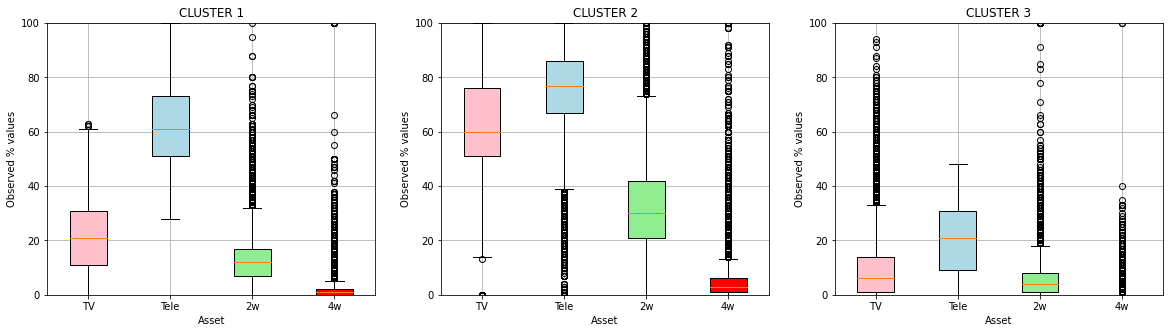

In [ ]:
_,_,_ = create_box_plots(cluster_0, cluster_1, cluster_2)

In [ ]:
vill_code_array = np.array(vill_code)
union_feature_indices = np.union1d(np.union1d(cluster_0[:, 1], cluster_1[:, 1]), cluster_2[:, 1]).astype(int)
original_indices = (vill_code_array[:,1])[union_feature_indices].astype('int64')

In [ ]:
df2 = df_asset[original_indices]

In [ ]:
valid_labels = y_kmeans[union_feature_indices]

In [ ]:
df2 = np.append(df2, valid_labels.reshape((valid_labels.shape[0], 1)), axis = 1)


In [ ]:
np.unique(valid_labels , return_counts=True)

(array([0, 1, 2], dtype=int32), array([154166,  66063, 120724]))

In [ ]:
df2.shape

(340953, 12)

In [ ]:
np.unique( df2[:,  -1] , return_counts=True) 

(array([0, 1, 2], dtype=object), array([154166,  66063, 120724]))

## logic based on cluster

In [ ]:
df2[np.where(df2[:,-1] == 0), -1] = -2
df2[np.where(df2[:,-1] == 1), -1] = -3
df2[np.where(df2[:,-1] == 2), -1] = -1


df2[np.where(df2[:,-1] == -2), -1] = 2 
df2[np.where(df2[:,-1] == -3), -1] = 3
df2[np.where(df2[:,-1] == -1), -1] = 1


In [ ]:

column_names = [ 'State' ,	'District1' ,	'District', 	'Ward' ,	'Name' ,	'TV' ,	'Cyc', 	'Tele' ,	'2w' ,	'4w' ,	'Vill Code' , 'ASSET_ADI' ]
#column_names = ['State', 'District', 'Subdistt', 'Town/Village(Code)', 'Ward', 'Name', 'BF_RUD', 'BF_INT', 'BF_ADV', 'BF_ADI']
df2 = pd.DataFrame(data = df2, index = np.arange(df2.shape[0]), columns = column_names)


In [ ]:
df2.head()

,State,District1,District,Ward,Name,TV,Cyc,Tele,2w,4w,Vill Code,ASSET_ADI
0,3,43,34223,0,Jhanda Bagga Nawan(108),93.1,90.8,90.1,50.4,18.3,34223,3
1,3,43,34224,0,Bal (109),89.4,70.2,93.3,53.8,16.3,34224,3
2,3,43,34225,0,Buh Gujran (112),69.1,71.8,80,32.7,10,34225,3
3,3,43,34228,0,Sharaf Ali Shahwala (100),51.3,80.8,68,33.3,2.6,34228,3
4,3,43,34230,0,Khiali (96),51.7,81,63.7,27.6,1.7,34230,3


In [ ]:
len(df2)

340953

In [ ]:
df2['ASSET_ADI']

0         3
1         3
2         3
3         3
4         3
         ..
340948    3
340949    3
340950    3
340951    3
340952    3
Name: ASSET_ADI, Length: 340953, dtype: object

In [ ]:
np.unique( np.array( df2['ASSET_ADI'] ) , return_counts=True) 

(array([1, 2, 3], dtype=object), array([120724, 154166,  66063]))

In [ ]:
pickle.dump(df2, open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_asset_without_outlier.pickle','wb'))

In [ ]:
df_recheck = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_asset_without_outlier.pickle','rb'))

In [ ]:
df_recheck.head()

,State,District1,District,Ward,Name,TV,Cyc,Tele,2w,4w,Town/Village(Code),ASSET_ADI
0,3,43,34223,0,Jhanda Bagga Nawan(108),93.1,90.8,90.1,50.4,18.3,34223,3
1,3,43,34224,0,Bal (109),89.4,70.2,93.3,53.8,16.3,34224,3
2,3,43,34225,0,Buh Gujran (112),69.1,71.8,80,32.7,10,34225,3
3,3,43,34228,0,Sharaf Ali Shahwala (100),51.3,80.8,68,33.3,2.6,34228,3
4,3,43,34230,0,Khiali (96),51.7,81,63.7,27.6,1.7,34230,3


In [ ]:
np.unique( np.array( df_recheck['ASSET_ADI'] ) , return_counts=True) 

(array([1, 2, 3], dtype=object), array([120724, 154166,  66063]))

## column change

In [ ]:
df_recheck_new=df_recheck.rename(columns = {'Vill Code':'Town/Village(Code)'})


In [ ]:
df_recheck_new.head()

,State,District1,District,Ward,Name,TV,Cyc,Tele,2w,4w,Town/Village(Code),ASSET_ADI
0,3,43,34223,0,Jhanda Bagga Nawan(108),93.1,90.8,90.1,50.4,18.3,34223,3
1,3,43,34224,0,Bal (109),89.4,70.2,93.3,53.8,16.3,34224,3
2,3,43,34225,0,Buh Gujran (112),69.1,71.8,80,32.7,10,34225,3
3,3,43,34228,0,Sharaf Ali Shahwala (100),51.3,80.8,68,33.3,2.6,34228,3
4,3,43,34230,0,Khiali (96),51.7,81,63.7,27.6,1.7,34230,3


In [ ]:
pickle.dump(df_recheck_new, open('/content/drive/MyDrive/Scripts_and_Data_Transfer/5.ADI_Analysis/2011_Original(Ground_Truth)_ADI_without_outlier/2011_ADI_orginal_asset_without_outlier.pickle','wb'))